In [5]:
pip install Pillow

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np 

In [7]:
def CalculateColorMap(im):
 colorMap = {
 }
 rows, cols = (im.size[0], im.size[1])
 indexImage = np.zeros((rows,cols))
 index = 0
 repeated = 0
 count = 0
 for i in range (0,im.size[0]):
   for j in range (0,im.size[1]):
     r, g, b = im.getpixel((i,j))
     if (r,g,b) in colorMap:
       repeadted = 0
     else: 
       colorMap[(r,g,b)] = index 
       index+=1
     count+=1
 for i in range (0,im.size[0]):
   for j in range (0,im.size[1]):
     r, g, b = im.getpixel((i,j))
     indexImage[i][j] = colorMap[(r,g,b)]


 indexImage = indexImage.astype(int)
 return colorMap , indexImage

In [8]:
def Exits(old_color,new_color_map,rang):
  for key in new_color_map:
    if(abs(key[0]-old_color[0])<=rang and abs(key[1]-old_color[1])<=rang and abs(key[2]-old_color[2])<=rang):
      return new_color_map[key]
  return -1

In [19]:
def QuantizationLevels(colorMap,rang):
  i=0
  newColorMap={}
  removedColors={}  
  for oldColor in colorMap:
    newIndex = Exits(oldColor,newColorMap,rang)

    if(newIndex==-1):
      newColorMap[oldColor]=i
      oldIndex=colorMap[oldColor]
      removedColors[oldIndex]= (oldColor,i)
      i+=1
    else:
      oldIndex=colorMap[oldColor]
      removedColors[oldIndex]= (oldColor,newIndex)
  return (newColorMap, removedColors)

In [10]:
def AdjustIndex(oldIndexMap,removedColors):
  
  width, height = im.size
  adjustedIndexMap= np.zeros((width,height))
  for y in range(height):
    for x in range(width):
        oldIndex = oldIndexMap[x][y]
        removed = removedColors[oldIndex]
        newIndex = removed[1]
        adjustedIndexMap[x][y]=newIndex

  adjustedIndexMap.astype(int)
  return adjustedIndexMap

In [11]:
def ReverseColorMap (colorMapQuantized):
   InvertedColorMap = {v: k for k, v in colorMapQuantized.items()}
   return InvertedColorMap

In [12]:
def ColorMapToImage (indexImageAdjusted,colorMapQuantized):
  xSize = len(indexImageAdjusted)
  ySize = len(indexImageAdjusted[0])
  s = xSize,ySize
  im = Image.new("RGB",s)
  for i in range (0,im.size[0]):
    for j in range (0,im.size[1]):
      colorIndex = indexImageAdjusted[i][j]
     # print(colorMapQuantized[indexImageAdjusted[i][j]])
      color = colorMapQuantized[colorIndex]
      r =  color[0]
      g =  color[1]
      b =  color[2]
      im.putpixel((i,j),(r,g,b))
  plt.imshow(im)

In [14]:
im = Image.open("Test Image.jpg")

In [15]:
colormap,indexmap = CalculateColorMap(im)

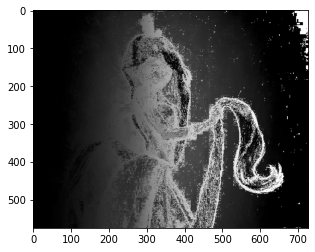

In [16]:
plt.imshow(indexmap.T, cmap="gray") 

In [29]:
newColorsMap,removedColorsMap = QuantizationLevels(colormap,10)

In [30]:
newIndex=AdjustIndex(indexmap,removedColorsMap)

In [31]:
InvertedColorMap = ReverseColorMap(newColorsMap)

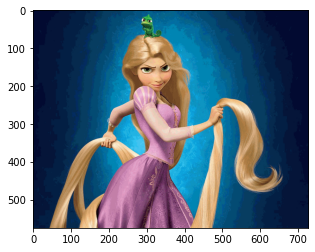

In [32]:
ColorMapToImage(newIndex,InvertedColorMap)